# Welcome to the ISIT Quantum Computing 101 Workshop

Next week is the start of the Quantum Computing Hackathon and this week we will go over the basics of programming quantum algorithms. This notebook will introduce you to the basics of Qiskit, IBM's Python package for quantum computing. Today we'll go through an introduction of how quantum computing works, what quantum circuits and what quantum gates are, and then start showing you some applications to get you ready for the hackathon.

## **Part 1: Quantum Computing Basics**

We will start with the basics of quantum computing -- building circuits, basic gates, and some basic algorithms.

### **Classical vs. Quantum and the Math of Quantum Computing**
We'll start with a distinction between classical and quantum computing, starting with classical bits (cbits) and quantum bits (qbits or qubits).

- **Cbits** have binary, or 1 of 2, states 0 and 1
- At any given time the bit will be in only one of the two states
- A classical computer with three bits have $$8 = 2^3$$ possible states: $$ 000, 001, 010, 100, 011, 101, 110, 111 $$

    - and more generally n bits will give us N states: $$N = 2^n$$

Classical gates implement binary operations on binary inputs

- **Qubits** are also binary, but their quantum behavior means they occupy their two states a bit differently:
    - Superposition and entanglement allow qubits to exist in their  |0〉and |1〉states simultaneously
- A general qubit is a linear combination in a vector space of n dimensions: $$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Basic operations can act on all qubits simultaneously

When we describe the binary states of single qubits, we use (Bra-)Ket notation. |0〉and |1〉represent 2 x 1 column vectors in the state 0 or 1.

$$ |0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix} \text{ and } |1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}$$


Think of it as a boolean, where a 1 in the top row tells us that we have a 0 state, or a 1 in the bottom row tells us that we have a 1 state.

This becomes more complex as we add more qubits. Which we will cover in the next section.




### **Quantum Circuits**
Quantum circuits are drawn with 3 basic elements
- The bits
    - Quantum circuits usually denote the number qubit in the sequence of bits with some symbol, typically $$q_n$$
    - In Qiskit our qubit numbers are 0-indexed, meaning when access qubits in our code,
  $$ 1^{st} \text { qubit} = q_0 \text {, } 2^{nd} \text { qubit} = q_1 \text {, etc.} $$

  In Qiskit, qubits are ordered using **little-endian** notation
  When displaying multiple qubit states it is ordered as:
$$ |q_n, ..., q_2, q_1, q_0\rangle $$

  **(remember that when we display our quantun states on a circuit the index of each qubit increase from top to bottom, but in Ket notation it increases from right to left)**
  
- The states
    - Quantum states are written in bra-ket notation, |0〉and |1〉 for single qubits, |00〉, |01〉, |10〉and |11〉, for two qubits, and all other combinations of states for n-qubits
    - When writing the states of multiple qubits as column vectors, similar to how we did |0〉and |1〉, we must first express the state as a tensor/Kronecker product of each state.
 $$ A \otimes B = \begin{pmatrix}a_1 \\ a_2\end{pmatrix} \otimes \begin{pmatrix}b_1 \\ b_2\end{pmatrix} = \begin{pmatrix}a_{1}b_{1}\\ a_{1}b_{2} \\ a_{2}b_{1} \\ a_{2}b_{2}\end{pmatrix}$$

$$ \text {Example 1: Two Qubits}$$
 $$|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix} \otimes \begin{pmatrix}1 \\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0 \\ 0 \\ 0\end{pmatrix}$$
$$ \text {Example 2: Three Qubits}$$
$$ |011\rangle = |0\rangle \otimes |1\rangle \otimes |1\rangle = \Bigg(\begin{pmatrix}1 \\ 0\end{pmatrix} \otimes \begin{pmatrix}0 \\ 1\end{pmatrix}  \Bigg)\otimes \begin{pmatrix}0 \\ 1\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix}$$
- The gates
    - Quantum gates represent the operations which act on our qubits, allowing us to control the state of one or multiple bits, and in quantum, the relative probablity of each qubits' state

<iframe src="https://drive.google.com/file/d/1MSUMkveG3CsLDO6Z1EburC7iHarAYIGt/preview" width="640" height="480" allow="autoplay"></iframe>

![](https://drive.google.com/uc?export=view&id=1MSUMkveG3CsLDO6Z1EburC7iHarAYIGt)

<p><a href="https://commons.wikimedia.org/wiki/File:The_Hadamard-CNOT_transform_on_the_zero-state.png#/media/File:The_Hadamard-CNOT_transform_on_the_zero-state.png"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png" alt="The Hadamard-CNOT transform on the zero-state.png" height="100" width="350"></a><br>


Lets start exploring programming quantum circuits in **Qiskit**

## **Part 2: Qiskit Circuits**

Now, let's get into Qiskit. As a first step, we'll have to install Qiskit in our notebook's cloud environment.

### **Qiskit packages**

**Add Qiskit to the Notebook**
To use Qiskit, we need to install the Python package. Running the following cell will install it in your environment for this notebook.

In [1]:
%pip install qiskit[visualization]
%pip install qiskit qiskit-aer
%pip install pylatexenc
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=45d1814a8239d1298e664059bf8633bf270bbe32cd580fe8f00c029122548e23
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.5 MB/s eta 0:00:00


#### **QiskitAer**

Now that we've downloaded the main qiskit packages, we'll need a few more packages to help us visualize our quantum circuits.

The first is **QiskitAer**, the simulator that will let us run out quantum circuits.


    !pip install qiskit qiskit-aer
    from qiskit import *
    from qiskit_aer.aerprovider import AerSimulator

Next we'll add a series of packages that will help us **visualize our circuits** in different ways, like circuit diagrams, histograms, and bloch spheres.

    import matplotlib.pyplot as plt
    from qiskit.visualization import plot_histogram, plot_state_qsphere, circuit_drawer, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, array_to_latex
    from qiskit.quantum_info import Statevector
The packages are already provided in the code box below. Run the code to install and import the packages.


In [2]:
from qiskit import *
from qiskit_aer.aerprovider import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_state_qsphere, circuit_drawer, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

### **Declaring Circuits**

Using Qiskit we can **declare a quantum circuit** using a simple command:
    
    Circuit Name = QuantumCircuit(# of qubits)
We can start with a circuit with 2 qubits:

In [3]:
# Fill in the quantum circuit declaration then uncomment the line of code below
# YOUR CODE HERE:
circ = QuantumCircuit(2)

You just declared a quantum circuit in qiskit!

But that doesn't tell us much about the circuit we just made...

What we need to do next is visualize the circuit we just declared. We'll start by having qiskit draw our quantum circuit for us:

    name.draw() #enter the name of your circuit in "name"

There are a few visualization methods that we'll going over in the workshop:
- Text Format or ASCII Art
        
        name.draw()

        
- Matplotlib Visualization

        name.draw(output = "mpl")


For our example we'll declare and draw a circuit named "circ" but you're free to draw the circuit you declared in the previous step.

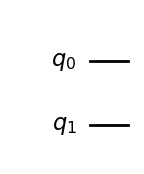

In [5]:
circ = QuantumCircuit(2)
circ.draw('mpl')

### **Adding gates to circuits**

Now we have a circuit with 2 qubits, but to make out circuit a bit more interesting, let's throw in some of those **quantum gates** we just talked about.

#### **Single-qubit gates**

##### Pauli Gates
The **Pauli Gates (XYZ)** act on a single qubit at a time

We have 3 Pauli or 180-degree rotation gates:

- X (NOT)
    - Also known as the NOT gate, the Pauli X operates similar to a classical NOT, where the state of our bit is simply flipped from |0〉to |1〉and vice versa.
  $$ \sigma_x = \begin{pmatrix}0&1\\1&0\end{pmatrix} $$

    <p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_NOT.svg#/media/File:Qcircuit_NOT.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Qcircuit_NOT.svg" alt="Qcircuit NOT.svg" height="200" width="200"></a><br>

  Pauli Z and Y gates are where we see more of the quantum side of qubits. Unlike cbits, qubits have both their binary state and also a complex phase. The Pauli Z and Pauli Y gates manipulate the phase of the qubit.
    
- Z
    - The Pauli Z gate flips the phase of a qubit in the |1〉state but does not change |0〉states
  $$ \sigma_z = \begin{pmatrix}1&0\\0&-1\end{pmatrix} $$

      <p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_Z.svg#/media/File:Qcircuit_Z.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Qcircuit_Z.svg" alt="Qcircuit Z.svg" height="200" width="200"></a><br
- Y
    - The Pauli Y gate flips the phase and state of the qubit (like doing X and Z operations at the same time)
$$ \sigma_y = \begin{pmatrix}0&-i\\ i&0\end{pmatrix} $$

    <p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_Y.svg#/media/File:Qcircuit_Y.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/7/79/Qcircuit_Y.svg" alt="Qcircuit Y.svg" height="200" width="200"></a><br>

##### The Hadamard Gate

The **Hadamard or H** gate transforms a qubit into an **equal superposition of  |0〉and  |1〉**

$$ H = \frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix} $$
- When you measure the qubit, you don’t always get a definitive 0 or 1. Instead, the qubit could be in either state, depending on the superposition
    - We'll explore more about measurements in the next module when we simulate measruements on our circuits in Qiskit

- Creating superpositions allows qubits to represent multiple possibilities simultaneously, which is the key feature in quantum computing

- If we were to apply the Hadamard gate twice on a single qubit, it returns the qubit to its original state. Mathematically, applying the gate twice is equivalent to the Identity Matrix



Lets start by making a few circuits with our **Pauli gates, X(not), Y, and Z**!

We can add a gate using the same syntax as before, but this time we'll need to tell qiskit what qubit to apply the gate to:

    name.x(qubit#) #applies an X or "not" gate to the specified qubit index
Using our "circ" example from before let's run a "not" gate on the first qubit in our circuit. (Remember that qiskit indexes qubits from 0, so our first bit is the 0 bit)

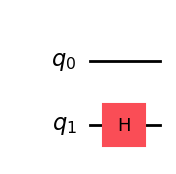

In [21]:
circ = QuantumCircuit(2)
circ.h(1)
#draw the circuit again to see the gate added
circ.draw('mpl')


Here's list of all the gates we've talked about so far and the qiskit syntax to apply our gates to our circuit:

    name.x    #the not (Pauli X) gate
    name.y    #the Pauli Y gate
    name.z    #the Pauli z gate
    name.h   #the hadamard gate


##### Measurement Gates

So far we've drawn our cicuit and added a gate, but if we wanted to see what our gate is doing to our qubits, we're gonna need to take some **measurements**.

In quantum computing, the state of our qubits are probabilistic:
- When we take measurements, we collapse our qubit into either |0〉or |1〉

- The probability is changed by the operations (gates) we applied before measuring
- In qiskit, measurements on quantum circuits need to be mapped to classical registers

<p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_measure-arrow.svg#/media/File:Qcircuit_measure-arrow.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Qcircuit_measure-arrow.svg" alt="Qcircuit measure-arrow.svg" height="200" width="200"></a><br>

To do so we'll need to define our quantum circuit a bit differently than we did before. This time we'll need to define our circuit with both qubits and cbits to map our measurements to

There are many ways to measure and display the data.

    CircuitName = QuantumCircuit(# of qubits, # of cbits)

Creates a circuit with the number of quantum registers we are performing measurements on, and the classical registers are used to store the measurement outcomes.

In this example, we will take measurements on the circuit we made before:

Paste or rewrite your code for your circuit in the section below. This time when we initialize our circuit we will need to include both the quantum and classical registers.
This time for our example we'll call our circuit "meas" since we'll be taking measurements on this circuit
    
    meas = QuantumCircuit(2,2)
The number of qubits we need for our ciruit is 2 and the number of cbits should be 2 or more.

Add a measurement to the circuit using
    
    meas.measure(qubit,cbit)
You can take a measurement on either qubit and map it to either cbit

    For example:
    meas.measure([0,1],[0,1])  
    specifies that qubit 0 and qubit 1 should be measured and respectively   
    stored in cbits 0 and 1 measures in z-basis
Once we have a measurement set up, we can redraw the circuit and see the measurement and the qubit/cbit we've mapped it to.

    meas.draw()


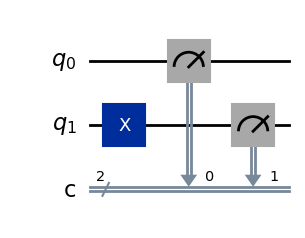

In [14]:
# Declare a quantum circuit with 2 qubit and 2 cbits with 1 NOT-gate and a measuremnt gate
meas = QuantumCircuit(2,2)
meas.x(1)
meas.measure([1,0],[1,0])
# Draw your circuit
meas.draw('mpl')

##### Rotation Gates

In Quantum Computing we have 3 rotation gates/operators: Rx, Ry, and Rz

To best explain rotation operators in quantum computing, we will start by reviewing one important reprentation of qubit states: The **Bloch Sphere**

We have already gone over how qubits have a binary state (|0〉and |1〉) and complex phase, and this phase is related to the relative probability of observing our qubits in a particular state. The bloch sphere is how we can represent that state in a 3D vector space.
From the rectangular representation of our wavefunction $$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$
where $|\alpha|^2$ is the probability of measuring in the state 0 and $|\beta|^2$ is the probability of measuring in the 1 state

 we can get the polar representation of this linear combination $$|\psi\rangle = r_{\alpha}e^{i\theta_{\alpha}}|0\rangle + r_{\beta}e^{i\theta_{\beta}}|1\rangle = e^{i\theta_\alpha}(r_{\alpha}|0\rangle + r_{\beta}e^{i(\theta_{\beta} - \theta_{\alpha})}|1\rangle)  $$

 $$|\psi'\rangle = cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

In the first form the global phase of the wave function is $e^{i\theta_{\alpha}} $

The global phase has no physical significance. $\psi$ and $\psi'$ gives the same measurement statistics. So we instead make a second conversion to $|\psi'\rangle$. In this form we are able to mathematically apply the rotation gates.



In [15]:
import numpy as np
# Step 1: Define an (arbitrary) normalized quantum state
psi = np.array([1 + 1j, -1j]) / np.sqrt(3)

# Print alpha and beta correctly using f-string
print(f"alpha: {psi[0]} and beta: {psi[1]}")

# Step 2: Extract the global phase from the first non-zero element (psi[0])
global_phase = psi[0] / np.abs(psi[0])  # = e^(i theta_alpha)

# Step 3: Remove the global phase
psi_no_global_phase = psi * np.conj(global_phase)

# Step 4: Compute measurement probabilities
prob_original = np.abs(psi) ** 2
prob_no_phase = np.abs(psi_no_global_phase) ** 2

# Display results
print("\nOriginal normalized state:        ", psi)
print("Global phase removed state:       ", psi_no_global_phase)
print("Measurement probabilities (φ):    ", prob_original)
print("Measurement probabilities (φ'):   ", prob_no_phase)

# Verify if measurement statistics are identical
if np.allclose(prob_original, prob_no_phase):
    print("\n✅ Measurement statistics are identical.")
else:
    print("\n❌ Measurement statistics differ.")

alpha: (0.5773502691896258+0.5773502691896258j) and beta: (-0-0.5773502691896258j)

Original normalized state:         [ 0.57735027+0.57735027j -0.        -0.57735027j]
Global phase removed state:        [ 0.81649658-2.63837978e-17j -0.40824829-4.08248290e-01j]
Measurement probabilities (φ):     [0.66666667 0.33333333]
Measurement probabilities (φ'):    [0.66666667 0.33333333]

✅ Measurement statistics are identical.


On the Bloch sphere, we are able to visualize the phase along both the polar angle Theta (θ)  and the rotation angle Phi (φ).

This is what allows us to plot our wave function in the bloch sphere space.
Our rotation operators will allow us to change the angle of each state on the bloch sphere. And when converted back to its rectangular form, the probability of each state is also changed.
<p><a href="https://commons.wikimedia.org/wiki/File:Bloch_sphere.svg#/media/File:Bloch_sphere.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Bloch_sphere.svg" alt="Bloch sphere.svg" height="252" width="238"></a><br>

Our first rotation is the Rx gate. This changes the angle of a single qubit about the x axis by a specified angle theta (θ). $$ R_{x}(\theta) = \begin{pmatrix}\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2})\\-i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{pmatrix} $$

Next is the Ry gate. This changes the angle of a single qubit about the y axis. $$ R_{y}(\theta) = \begin{pmatrix}\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2})\\\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{pmatrix} $$

The same principle applies to the Rz gate, which changes the angle about the z axis. $$ R_{z}(\theta) = \begin{pmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{pmatrix} $$

We will practice applying our rotation gates to a quantum circuit like we did before.
Qiskit syntax is the not the same for our rotation gates as other single-qubit gates. We need to specify our angle (θ) in radians between 0 and 2π, and the qubit we want this gate to act on:

    name.rx(θ, qubit) #x rotation
    name.ry(θ, qubit) #y rotation
    name.rz(θ, qubit) #z rotation
    
    #for adding values like π or π/2, we can use numpy, which we imported earlier as np with our other python libraries
    #for example:
    np.pi #is the command for π

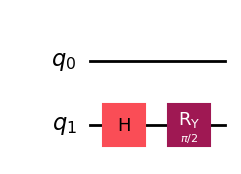

In [22]:
circ.ry((np.pi)/2, 1)
#draw the circuit again to see the gate added
circ.draw('mpl')
#Try out different rotation gates

#### **Multi-qubit gates**

We've gone through the single-qubit gates, now let's work with some gates acting on multiple qubits at once.

##### Controlled Gates
**Controlled gates**, like Controlled-NOT(CNOT/CX) and Controlled-Z(CZ),operate on 2 gates, 1 **control** and 1 **target**.


*   The operation of the gate depends on the control. **The gate only acts if the state of the control is |1〉**
*   The target is the qubit that our gate will affect. It depends on the control.

<p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_CNOT.svg#/media/File:Qcircuit_CNOT.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Qcircuit_CNOT.svg" alt="Qcircuit CNOT.svg" height="200" width="200"></a><br>

In a **CNOT** gate, the NOT operation is only active on the target if the control is in the |1〉state

If we have a 2-qubit circuit with the control in the |1〉and the target in the |0〉state, the state of the target qubit flips.
If the control is in the |0〉state however, the state of the target is unchanged.

$$ CX(0,1)|01\rangle \rightarrow |11\rangle $$

$$ CX(0,1)|10\rangle \rightarrow |10\rangle $$

We also see something similar with the **Controlled-Z** (or CZ) gate:

<p><a href="https://commons.wikimedia.org/wiki/File:Qcircuit_CC.svg#/media/File:Qcircuit_CC.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Qcircuit_CC.svg" alt="Qcircuit CC.svg" height="200" width=200"></a><br>

$$ CZ(0,1)|10\rangle \rightarrow |10\rangle $$

$$ CZ(0,1)|01\rangle \rightarrow |01\rangle $$

$$ CZ(0,1)|11\rangle \rightarrow |1\rangle \otimes -|1\rangle $$

Similar to the CNOT and CZ gates is the **Toffoli** or CCNOT/CCX gate
- The CCX gate functions the same as a CX gate except there are now 2 control qubits instead of jsut one. Now the state of the target qubit depends on both controls being in the |1〉state.

<p><a href="https://commons.wikimedia.org/wiki/File:Toffoli_gate.svg#/media/File:Toffoli_gate.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Toffoli_gate.svg" alt="Toffoli gate.svg" height="200" width="200"></a><br>

$$ CCX(0,1,2)|001\rangle \rightarrow |001\rangle $$
$$ CCX(0,1,2)|011\rangle \rightarrow |111\rangle $$
$$ CCX(0,1,2)|111\rangle \rightarrow |011\rangle $$

Finally, the **swap** gate does just that – it swaps two qubits
<p><a href="https://commons.wikimedia.org/wiki/File:Swap_gate.svg#/media/File:Swap_gate.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Swap_gate.svg" alt="Swap gate.svg" height="200" width="200"></a><br>

$$\text{SWAP}(|a\rangle \otimes |b\rangle) = |b\rangle \otimes |a\rangle$$

To apply our multi-qubit gate, we call our gate like before and this time identify first the control and then the target.

    name.cx(control qubit#, target qubit#)

Let's use the CNOT gate on our quantum circuit from before:

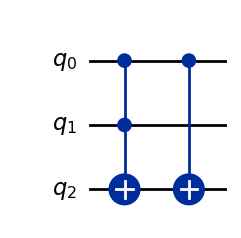

In [27]:
#declare a new circuit OR use the circuit from the previous section
ex1 = QuantumCircuit(3)
#add a CNOT gate with qubit0 as the control and qubit1 as the target
ex1.ccx(0,1,2)
ex1.cx(0,2)
#Draw your circuit to see the gate
ex1.draw('mpl')

Here's list of some useful multi-qubit gates and the qiskit syntax to apply our gates to our circuit:

    name.cx(control, target)
    name.cz(control, target)
    name.ccx(control1, control2, target)
    name.swap(control, target)

### **Displaying circuits**

Qiskit allows us to display our quantum circuits with different visualizations. Today we'll be going over how to set up and display measurements:

Uncomment the code in the box, display the output and plot it on a histogram.
A few ways to display the data include:
    
    print(counts)
    plot_histogram(counts)

There's even more you can do with these plots!
After you've taken measurements on the circuit you can run two sets of measurements at once and compare the output.
    
    
    second_result = backend.run(transpile(name, backend), shots=N).result()
    second_counts  = second_result.get_counts(name)

Add a legend to keep track of the different measurements

    legend = ['First execution', 'Second execution']
    plot_histogram([counts, second_counts], legend=legend)

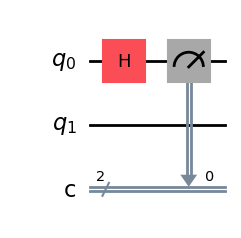

In [28]:
ex2 = QuantumCircuit(2,2)
ex2.h(0)
ex2.measure(0,0)
ex2.draw('mpl')

{'01': 500, '00': 500}


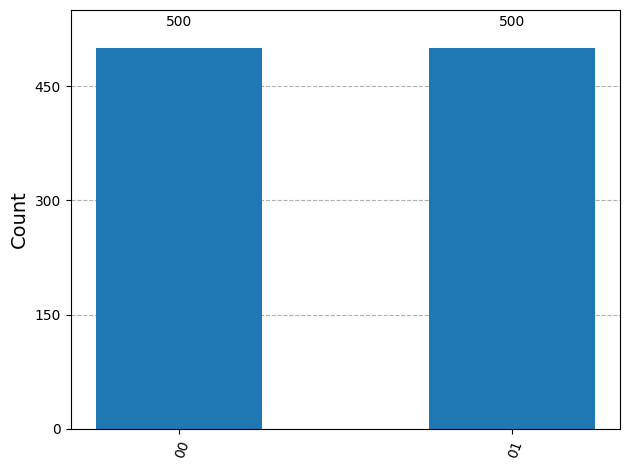

In [36]:
# Declare a quantum circuit of 2 qubits using any of the gates we have discussed so far
# Once you have a circuit take a measurement
ex2 = QuantumCircuit(2,2)
ex2.h(0)
ex2.measure(0,0)
#******UNCOMMENT BELOW****************
#and add the name of your circuit

backend = AerSimulator()   #a quantum simulator
N = 1000 #change how many measurements you want to take
result = backend.run(transpile(ex2, backend), shots=N).result()
counts = result.get_counts(ex2)


#******UP TO HERE********************

##############implement different display methods
print(counts)
plot_histogram(counts)


This quantum circuit can also be simulated as a quantum state/complex vector with dimensions $2^n$, where $n$ is the number of qubits. (If n is too large, your code will be unable to run on your pc)

Many ways to view the state vector:

1. If you DON'T save_statevector() in the code above:
- Set the input state with 2 qubits
    
    
        n = 2
        state = Statevector.from_int(0, 2**n)
- Evolve the state by the quantum circuit

    
        state = state.evolve(name)
- Draw using Latex for the Dirac notation of of your circuit

    
        state.draw('latex')

- Draw using qsphere to plot the circuit on a Bloch Sphere
    
        state.draw('bloch')
- Draw each plot one at a time to see the different ways we can visualize our circuit


2. A different way is to save the statevector right after creating the circuit using the QiskitAer simulator like we did for the measurements. Qiskit provides many different [tutorials for using additional simulations](https://qiskit.github.io/qiskit-aer/tutorials/index.html)
- backend = AerSimulator() is the device to run on

    
        backend = AerSimulator()
        result = backend.run(transpile(name, backend)).result()
        psi = result.get_statevector(name)
- plot_state_qsphere(psi) is a Qiskit unique view of a quantum state

    
        plot_state_qsphere(psi)

In [39]:
#Using method 1:
#generate a quantum circuit with a hadarmard gate
ex3 = QuantumCircuit(2)
ex3.h(0)
ex3.rx((np.pi)/2, 1)
#and display it on a bloch sphere
n = 2
state = Statevector.from_int(0, 2**n)
state = state.evolve(ex3)
state.draw('bloch')

#Try other display methods
#state.draw('qsphere')
#state.draw('latex')
#state.draw('hinton')
#state.draw('city')

<IPython.core.display.Latex object>

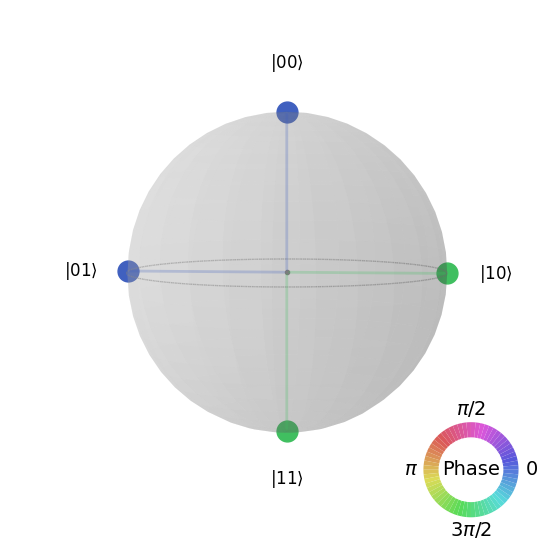

In [41]:
#Using Method 2:
# Paste your circuit declaration and gates from the previous box and now add name.save_statevector()
ex3 = QuantumCircuit(2)
ex3.h(0)
ex3.rx((np.pi)/2, 1)
ex3.save_statevector()
#use the QiskitAer simulator to plot on the qshpere
backend = AerSimulator()
result = backend.run(transpile(ex3,backend)).result()
psi = result.get_statevector(ex3)
plot_state_qsphere(psi)

## **Part 3: Combining Gates for Meaningful Circuits**

### Using Multiple Gates
- Applying multiple gates to the same circuit in succession lets us perform more advanced manipulation of our qubits
- Gates can be added to a circuit sequentially using the same syntax as we used before


### A Simple Example
Let's create our first circuit with multiple gates interacting. First, we'll create a very simple circuit to see how gates perform sequentially.

Create a circuit with two quantum registers and one classical register, with two NOT (Pauli X) gates on the first quantum register before a measurement. In a moment, we'll simulate running that circuit 100 times and print the result. Think/discuss with a partner now: what result do you expect to see?

First, let's create and draw our circuit.

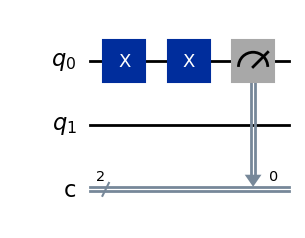

In [42]:
# Declare a circuit with 2 quantum registers and 1 classical register
circ = QuantumCircuit(2,2)

# Add two Pauli-X (NOT) gates to the first quantum register
circ.x(0)
circ.x(0)

# Create a measurement from the first quantum register to the classical register
circ.measure(0,0)

# Draw the circuit
circ.draw('mpl')

Now, lets simulate the circuit and see the outcome.



{'00': 100}


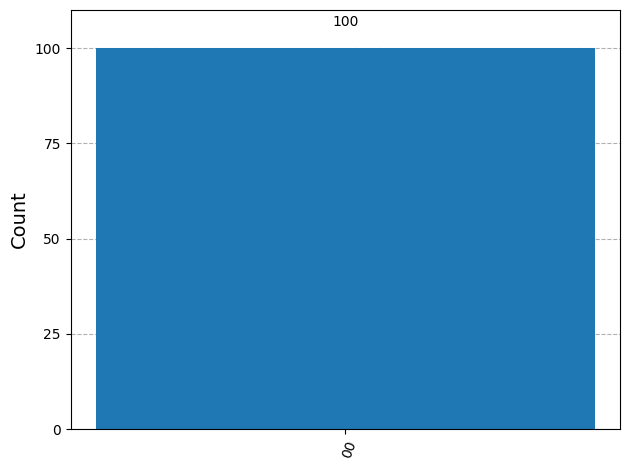

In [43]:
# Declare a backend for your simulation
backend = AerSimulator()


# Run the circuit on the backend and print the results
sim = backend.run(circ, shots=100)
results = sim.result()
counts = results.get_counts(circ)
print(counts)
plot_histogram(counts)

Compare the outcome of the measurement to what you predicted? Did it meet your expectations? Do you understand why the circuit ran the way it did?

### Real World Examples: **Generating a Bell Pair**

The last circuit always produced the same output. This is fine, but classical computers can do it too. Let's create something that takes advantage of the properties of quantum computers.

We're going to make a circuit that generates a **Bell State**. A Bell State is a state with two qubits that are maximally entangled.
- Bell States are some of the simplest examples of quantum entanglement
- Used to put two qubits in an EQUAL superposition. Thus, there is an equal probability of measuring either state

We actually saw the circuit for the Bell State in an earlier module:
<p><a href="https://commons.wikimedia.org/wiki/File:The_Hadamard-CNOT_transform_on_the_zero-state.png#/media/File:The_Hadamard-CNOT_transform_on_the_zero-state.png"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png" alt="The Hadamard-CNOT transform on the zero-state.png" height="100" width="350"></a><br>

When looking at the equation for a linear combination of multiple entangled qubits $$ |\psi\rangle = \alpha|0\rangle + \alpha|1\rangle $$ alpha (α) tells us about the relative probability of measuring each possible state of all the qubit in the circuit. The probability is given by $$ |\alpha|^2 $$ In the case of the Bell State, we have the linear combination of $$ |\psi\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$ where $$ \alpha = \frac{1}{\sqrt{2}} $$ meaning we have a 1/2 probability of measuring our qubits in one of the entagled states $$ |\psi\rangle = |00\rangle \text { or } |\psi\rangle = |11\rangle $$

Let's get started building the circuit and then investigate its behavior. Follow the instructions below to build and draw the circuit.
1. Use a Hadamard gate to put a single qubit in a superposition of |0〉&  |1〉
2. Use a CNOT gate to tie that state to a second qubit


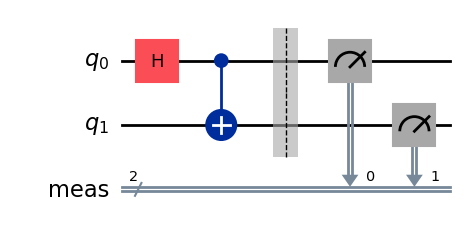

In [44]:
# Define a circuit with 2 quantum registers
bell = QuantumCircuit(2)

# Add a Hadamard gate to the first quantum register
bell.h(0)

# Add a CX gate with the first register acting as the control bit
bell.cx(0,1)

# Add a measurement for each register (HINT: try measure_all())
bell.measure_all()

# Draw the circuit
bell.draw('mpl')

Now that the circuit's built, let's simulate it 1000 times. Before we do, any predictions for what we'll see?

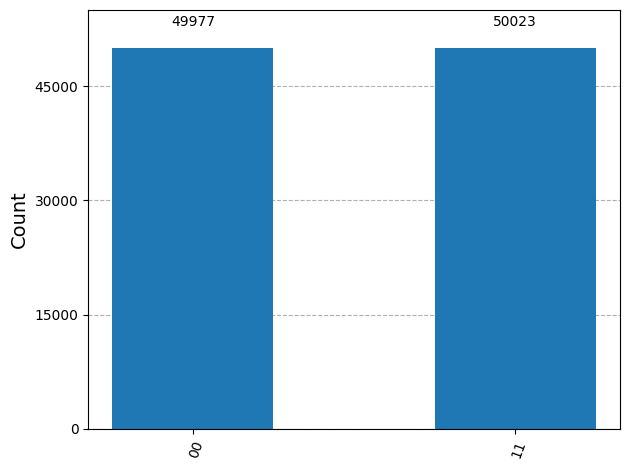

In [50]:
# Declare a backend for your simulation
backend = AerSimulator()

# Run the circuit with 1000 shots
sim = backend.run(bell, shots=100000)

# Get the results
results = sim.result()
counts = results.get_counts(bell)
plot_histogram(counts)

What do you see? If everything was done correctly, your histogram should have two outputs, |00〉 and |11〉, with about equal probability of occuring.

Notice that the qubits are in the same state in *every outcome* -- they're either both 0s or both 1s!

#### Entangling Three Qubits

Our previous circuit entangled two qubits so that they would always have the same value. Can we extend this to three qubits?

Thinking through the steps we took in the previous example, try to create a circuit that always outputs |000〉 or |111〉. We've provided the basic outline, but the implementation is up to you!

$$ |\psi\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$$

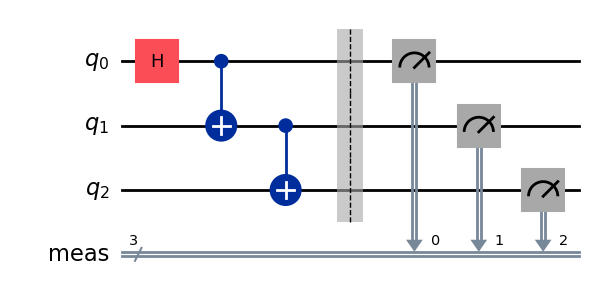

In [55]:
# Define a circuit with 3 quantum registers
ghz = QuantumCircuit(3)

# Add gates to entangle three qubits
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
#ghz.cx(0,2)

# Measure
ghz.measure_all()

# Draw
ghz.draw('mpl')

Once you've created your circuit and the drawing looks right, simulate its execution below to see if it works as intended. If not, see if you can make a fix!

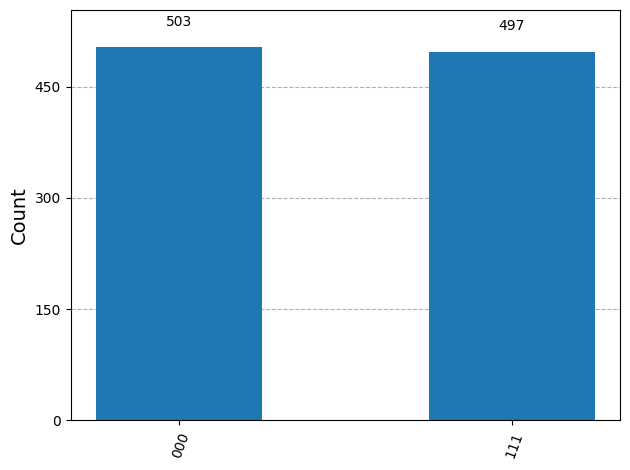

In [58]:
# Declare a backend
backend = AerSimulator()

# Run the circuit with 1000 shots
sim = backend.run(ghz, shots=1000)

# Get the results
results = sim.result()
counts = results.get_counts(ghz)
plot_histogram(counts)

If you got it, congrats! You just entangled 3 qubits! This is called a **GHZ state**, an equal superposition of 3 qubits.

This could be scaled up to entangle any number of qubits by simply adding more CX gates from the first qubit to all the others.

### **Quantum Teleportation**

What if one user wanted to send the state of a qubit to some other user?
**No Cloning Theorem**: It's impossible to create an independent copy of a quantum state.
Why not? “Moving” the state would require disrupting it, meaning it loses its quantumness.
What do we do instead? Teleport!


![](https://drive.google.com/uc?export=view&id=1ZcI-vc_jZYkjP3kEjypnLQQgQGpqWkzZ)

Alice and Bob share entagled bits. Alice wants to send state $|\psi\rangle$ we can't just move the state, but we can start Alice and Bob (the messenger and receiver) with a set of entangled qubits.

Alice can entangle her bit with another register containing the message she wants to send.

Bob, then on his register, decodes the original message based on the states of the classical bits received. To do so we use the following rules to decode the cbits.
$$ |00\rangle \rightarrow \text {nothing}$$
$$ |01\rangle \rightarrow \text {X} $$
$$ |10\rangle \rightarrow \text {Z}$$
$$ |11\rangle \rightarrow \text {ZX}$$

By taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state
to Bob

**Quantum Teleportation**: Destroy the original quantum state and recreate it elsewhere.
What does this mean for Qiskit?
Send a quantum state from one register to another

For the next example, we're going to **teleport a quantum state from one register to another**:
1. Create a state on the first quantum register to teleport
2. Create two more registers to entangle and create a destination for teleportation
3. Measure the circuits
    - If everything went right, the **third** register will always show the state we set up on the **first** register.

Here's what to keep track of: we'll start by applying a NOT gate to the first register, giving it value |1〉(remember that it starts at |0〉 by default). We'll then entangle two other quantum registers and prepare a teleportation protocol to send that |1〉value to the final register in the circuit.

Let's give it a try!

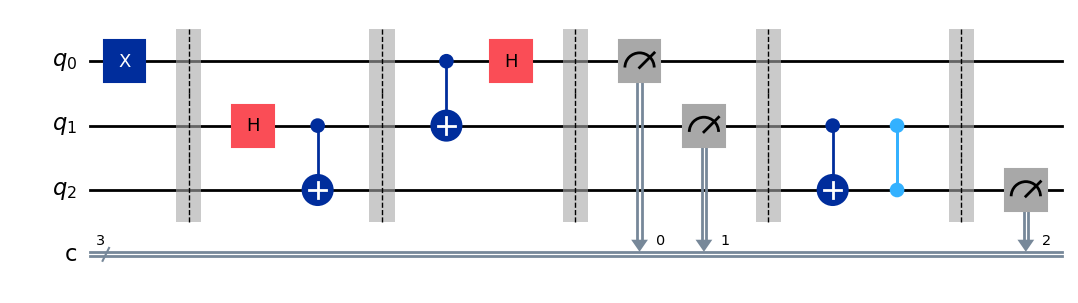

In [59]:
# q0 and q1 are the alice registers
# q2 is the bob register
# Declare a circuit with 3 quantum registers and 3 classical
qtel = QuantumCircuit(3,3)

# Apply a NOT gate to the 1st register, giving it value |1>
qtel.x(0)

qtel.barrier() # Just add to split it up visually, doesn't do anything

# Create a bell state between the 2nd and 3rd registers
qtel.h(1)
qtel.cx(1,2)

qtel.barrier() # Just add to split it up visually, doesn't do anything

# "Rotate" the states back to measureable quantities
qtel.cx(0, 1)
qtel.h(0)

qtel.barrier() # Just add to split it up visually, doesn't do anything

# Measure the 1st and 2nd registers (measure from the 1st quantum register to the 1st classical and from the 2nd to the 2nd), collapsing their states
qtel.measure(0, 0)
qtel.measure(1, 1)

qtel.barrier() # Just add to split it up visually, doesn't do anything

# Add a CX gate from 2nd to 3rd register
qtel.cx(1,2)

# Add a CZ gate from 1st to 3rd register
qtel.cz(1,2)

qtel.barrier() # Just add to split it up visually, doesn't do anything

# Teleportation complete! Measure the final register to see the result
qtel.measure(2,2)

# Draw the circuit
qtel.draw('mpl')

If everything went correctly, your diagram should match the image on the slides! Now, give measurement a go.

As a note: the qubits at the bottom of the histogram follow the same *little-endian* notation we mentioned at the beginning, and go in the order c2, c1, c0 with **c2 being at the bottom**. So, if the bottom-most number is always 1, you got the right result!

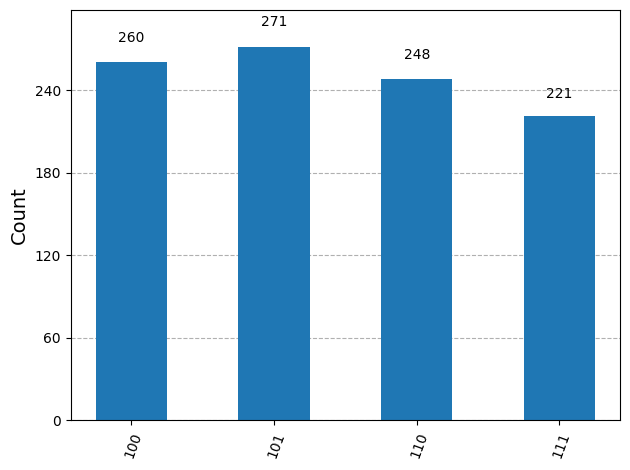

In [62]:
# Declare a backend
backend = AerSimulator()

# Run the circuit with 1000 shots
sim = backend.run(qtel, shots=1000)

# Get the results
results = sim.result()
counts = results.get_counts(qtel)
plot_histogram(counts)

For every output, our third reister c2 is always in the $|1\rangle$ state.

As you can see, the state ($|1\rangle$) we created on the first register is no longer there. It's on the third register instead!

### **Quantum Superdense Coding**

Similar to Teleportation, we can use *Superdense Coding* to send two classical bits to another party, but instead of transmitting two qubits with one cbit, we are able to send two classical bits using just a single qubit of communication.

One key circuit in superdense coding is the *Bell State* which we covered earlier. In superdense coding, the qubit transmitting the message between our messenger and receiver needs to be encoded by a third party, with the Bell State acting as our encoder circuit. This is in addition to the encoding of the message directly.

![](https://drive.google.com/uc?export=view&id=1Ee4IL6d8TO0flZ8ymK4u4qJBuPiLZcA8)

On the receiver side, we reverse the order of our Bell circuit to decode the message.

In total we have 3 steps:
1. Alice (Messenger) encodes the message/state they want to send
    - For the encoding step, we need to follow specific encoding rules to ensure that the right message is decoded
    - Encoding is done by applying a series of gates to the original message to alter the state in such a way that the third party and receiver conversions result in our original state
    - Since we are transmitting a two-bit message, we have 4 resulting states, and thus 4 main encoding rules:

$$ |00\rangle \cap I \mapsto |00\rangle + |11\rangle $$
$$ |01\rangle \cap X \mapsto |10\rangle + |01\rangle $$
$$ |10\rangle \cap Z \mapsto |00\rangle - |11\rangle $$
$$ |11\rangle \cap ZX \mapsto -|10\rangle + |01\rangle $$
        
2. Third party encodes the qubit
    - We to generate a Bell State

3. Bob (Receiver) decodes the original message
    - The Bell circuit is reversed and the orginal message is received

As an example, we will send |01〉as our 2-bit message using superdense coding.


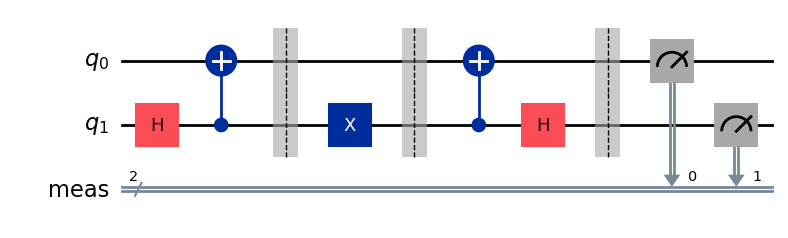

In [63]:
#initialize quantum circuit
sdc = QuantumCircuit(2)

#Third party qubit encoding (bell state)
sdc.h(1)
sdc.cx(1,0)
sdc.draw('mpl')
sdc.barrier() #visual barrier (does nothing)

#Alice/Tx classical message encoding
#We want to send 01, so we need an x-gate
sdc.x(1)
sdc.draw('mpl')
sdc.barrier() #visual barrier (does nothing)

#Bob/Rx decoding (reverse of bell state)
sdc.cx(1,0)
sdc.h(1)

sdc.measure_all()
sdc.draw('mpl')


To check the success of our encoder we can plot our measurements like we did with teleportation, and check on the message we received.

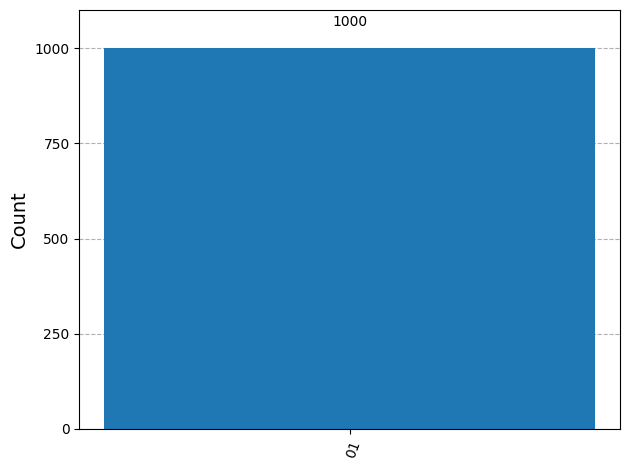

In [64]:
# Declare a backend
backend = AerSimulator()

# Run the circuit with 1000 shots
sim = backend.run(sdc, shots=1000)

# Get the results
results = sim.result()
counts = results.get_counts(sdc)
plot_histogram(counts)

## Part 4: Grover's Algorithm

Click [HERE](https://colab.research.google.com/drive/1-KFM4wglJH4-APgZyaZZf1WEDu4sQs8A#scrollTo=N25elaDJKmql) for Grover's Algorithm tutorial notebook

*Prepared by Erin Diran-Ojo for the ISIT 2025 Quantum Hackathon*

![](https://drive.google.com/uc?export=view&id=1-iKFdcD2sGyoTg0V9VgOUwo2Yiwsurm7)

![](https://drive.google.com/uc?export=view&id=1GkYreZpjLdmmmARYqenYpDF6Wupe4Hal)
